In [1]:
#!/usr/bin/env python3

import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
from dateutil.parser import parse
import pandas as pd

keys = [ "Star", "JD", "Calendar Date", "Magnitude", "Error", "Filter", "Observer", "Expand" ]

def parse_row(value: str) -> map:
    data = {}
    cols = value.split("\n")[2:-2]

    for k in range(len(cols)):
        data[keys[k]] = cols[k]
    
    return data

def parse_page(url: str) -> list:
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    table = soup.find_all("table", {"class": "observations"})[0]
    even_row_values = table.find_all("tr", {"class": "obs tr-even"})
    odd_row_values = table.find_all("tr", {"class": "obs tr-odd"})
    contents = []

    for row in even_row_values:
        contents.append(parse_row(row.text))

    for row in odd_row_values:
        contents.append(parse_row(row.text))
    
    return contents

data = []

# 315 total pages of https://app.aavso.org/webobs/results/?star=000-BCQ-471&num_results=200&page=PAGE_NUM
for i in range(1, 316):
    url = f"https://app.aavso.org/webobs/results/?star=000-BCQ-471&num_results=200&page={i}"

    tmp = parse_page(url)

    data.extend(tmp)
    
for x in data:
    date = x["Calendar Date"][:x["Calendar Date"].rfind(".")]
    date = datetime.strptime(date, "%Y %b. %d").strftime("%d/%m/%Y")
    x["Calendar Date"] = date

data.sort(key=lambda x : datetime.strptime(x["Calendar Date"], "%d/%m/%Y"))

data = data[::-1]

In [2]:
J = []
M = []

for x in data:
       J.append(x["JD"])
       M.append(x["Magnitude"])

In [2]:
tmpJ = J[-500:]
tmpM = M[-500:]

dat = []

for i in range(500):
    dat.append([tmpJ[i], tmpM[i]])

df = pd.DataFrame(dat)
df.to_excel(excel_writer = "excel.xlsx")

NameError: name 'J' is not defined

In [9]:
np.polyfit(np.log(P)-1, M, 1)

['2404174.5640', '2404174.4740', '2404172.5440', '2404173.4540', '2404172.4640', '2404171.4440', '2404170.5140', '2404158.5140', '2404157.4940', '2404156.4940', '2404147.2940', '2404145.3440', '2404136.3440', '2404129.3240', '2404125.3440', '2404122.3440', '2404121.2640', '2404119.2740', '2404116.3140', '2404102.2940', '2404101.2540', '2404100.2640', '2404097.2440', '2404096.4340', '2404094.2540', '2404093.2640', '2404092.2340', '2404091.2540', '2404090.4540', '2404088.3440', '2404064.2440', '2404062.2140', '2404053.2740', '2404051.3640', '2404049.2340', '2404047.4540', '2404045.2840', '2404042.2340', '2404040.2840', '2404039.2940', '2404037.3040', '2404035.5240', '2404033.4440', '2404025.2440', '2404023.4940', '2404019.4940', '2404014.2740', '2404012.2840', '2404009.4240', '2404008.4640', '2404000.5540', '2403998.3840', '2403989.4640', '2403987.2940', '2403983.3340', '2403982.4040', '2403981.3140', '2403978.3340', '2403977.3840', '2403972.3640', '2403970.4740', '2403969.3440', '240396

In [10]:
print(tmpM)

['3.85', '3.90', '3.50', '3.70', '3.50', '4.10', '4.00', '3.90', '3.67', '3.43', '4.00', '3.64', '3.65', '3.90', '3.50', '4.10', '4.02', '3.70', '4.10', '3.80', '4.20', '4.10', '3.60', '4.04', '4.02', '3.68', '3.50', '4.04', '4.15', '3.75', '4.04', '4.05', '4.15', '4.02', '3.70', '4.15', '3.93', '4.15', '3.90', '3.65', '4.15', '4.10', '3.63', '4.00', '3.68', '4.07', '4.00', '3.70', '4.20', '4.02', '3.57', '4.05', '3.95', '3.90', '3.96', '4.10', '3.90', '4.00', '4.06', '4.05', '3.83', '3.60', '4.07', '3.90', '3.70', '4.08', '4.00', '3.65', '3.55', '3.96', '3.87', '3.65', '3.40', '4.04', '4.00', '3.50', '3.93', '4.08', '4.08', '3.93', '4.00', '3.70', '3.70', '3.43', '3.46', '4.10', '4.04', '3.94', '3.44', '4.05', '3.65', '4.00', '3.90', '3.70', '3.90', '3.65', '3.50', '3.66', '3.37', '4.00', '4.05', '4.06', '4.00', '3.90', '3.70', '3.50', '3.40', '3.60', '3.70', '3.60', '4.06', '3.75', '3.60', '3.90', '4.00', '3.80', '4.13', '4.07', '3.68', '3.90', '3.63', '3.65', '4.12', '3.70', '3.58',

In [11]:
import pandas as pd

dat = []

for i in range(500):
    dat.append([tmpJ[i], tmpM[i]])

df = pd.DataFrame(dat)
df.to_excel(excel_writer = "excel.xlsx")

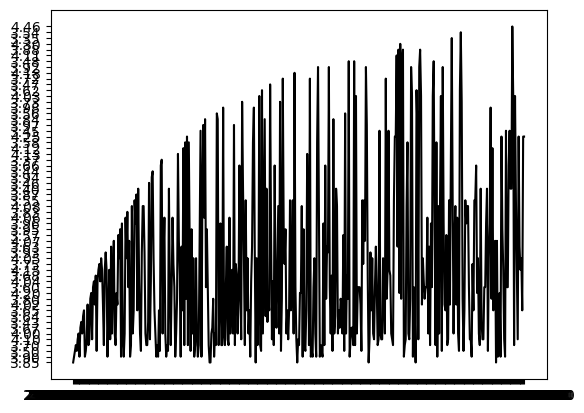

In [12]:
from matplotlib import pyplot as plt
plt.plot(tmpJ, tmpM, color="black")